## Classification on Stock Market (S&P 500) using Naive Bayes and Logistic Regression

Classification in Machine Learning

A machine learning classifier will be implemented to determine whether a stock is a Buy, Sell, or a Hold. In order to determine whether a stock or company falls into one of these three categories or classes, I will be taking a look at Trump Twitter Index. This created index contain the necessary financial information we require to train the machine learning classifier in the ways of Sentimental Analysis.

In [1]:
import csv
import pandas as pd
import numpy as np

### Importing Libraries and Preprocessed the Data

In [2]:
# Read S&P500 file as csv
data = pd.read_csv('../datasets/tweets/combined_trump_index.csv', sep='\t')
data.head()

,Unnamed: 0,Date,High,Low,Open,Close,Volume,Adj Close,Return,Intraday Return,Volume Return,Open-Close Movement,High-Low Ratio,retweet_count,favorite_count,vader compound,vader sentiment,Trump Twitter Index,Close_TTI,Volume_TTI
0,1,2017-01-20,2276.959961,2265.010010,2269.959961,2271.310059,3524970000,2271.310059,0.003366,0.000595,0.113393,0.276982,0.527589,415061,1878671,2.2815,positive,0.135696,2269.965939,8.042219e+09
1,2,2017-01-23,2271.780029,2257.020020,2267.780029,2265.199951,3152710000,2265.199951,-0.002690,-0.001138,-0.105607,-0.155418,0.653960,26750,177839,0.4939,positive,-0.056192,2267.777551,1.557123e+09
2,3,2017-01-24,2284.629883,2266.679932,2267.879883,2280.070068,3810960000,2280.070068,0.006565,0.005375,0.208789,0.118309,0.791905,247498,1162781,1.6901,positive,0.908453,2267.919940,6.440903e+09
3,4,2017-01-25,2299.550049,2288.879883,2288.879883,2298.370117,3846020000,2298.370117,0.008026,0.004146,0.009200,0.386383,0.466174,138054,761424,0.7527,positive,0.312087,2288.893518,2.894899e+09
4,5,2017-01-26,2300.989990,2294.080078,2298.629883,2296.679932,3610360000,2296.679932,-0.000735,-0.000848,-0.061274,0.011302,0.301206,128887,609647,-0.4878,negative,0.041381,2298.631683,-1.761134e+09


In [3]:
data=data.drop(['Unnamed: 0','Date','vader sentiment'], axis=1)
data

,High,Low,Open,Close,Volume,Adj Close,Return,Intraday Return,Volume Return,Open-Close Movement,High-Low Ratio,retweet_count,favorite_count,vader compound,Trump Twitter Index,Close_TTI,Volume_TTI
0,2276.959961,2265.010010,2269.959961,2271.310059,3524970000,2271.310059,0.003366,0.000595,0.113393,0.276982,0.527589,415061,1878671,2.2815,0.135696,2269.965939,8.042219e+09
1,2271.780029,2257.020020,2267.780029,2265.199951,3152710000,2265.199951,-0.002690,-0.001138,-0.105607,-0.155418,0.653960,26750,177839,0.4939,-0.056192,2267.777551,1.557123e+09
2,2284.629883,2266.679932,2267.879883,2280.070068,3810960000,2280.070068,0.006565,0.005375,0.208789,0.118309,0.791905,247498,1162781,1.6901,0.908453,2267.919940,6.440903e+09
3,2299.550049,2288.879883,2288.879883,2298.370117,3846020000,2298.370117,0.008026,0.004146,0.009200,0.386383,0.466174,138054,761424,0.7527,0.312087,2288.893518,2.894899e+09
4,2300.989990,2294.080078,2298.629883,2296.679932,3610360000,2296.679932,-0.000735,-0.000848,-0.061274,0.011302,0.301206,128887,609647,-0.4878,0.041381,2298.631683,-1.761134e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,3288.129883,3268.429932,3271.129883,3288.129883,3456380000,3288.129883,0.006976,0.005197,0.075759,0.177004,0.602734,268945,1381607,-0.7894,-0.410250,3271.117341,-2.728466e+09
750,3294.250000,3277.189941,3285.350098,3283.149902,3665130000,3283.149902,-0.001515,-0.000670,0.060396,-0.084540,0.520570,291642,1396729,4.0937,-0.274155,3285.341753,1.500394e+10
751,3298.659912,3280.689941,3282.270020,3289.290039,3716840000,3289.290039,0.001870,0.002139,0.014109,-0.026800,0.547750,99948,424979,1.2886,0.275602,3282.278416,4.789520e+09
752,3317.110107,3302.820068,3302.969971,3316.810059,3535080000,3316.810059,0.008367,0.004190,-0.048902,0.415893,0.432662,295611,1444412,4.3147,1.807943,3303.024708,1.525281e+10


### Creating the Classes Labels

To categorise or classify each Trump's tweet based on Trump Twitter Index, I will keep things simplified i.e. if the price went up a significant amount in the next day, then it’s a Buy. If down, then it’s a Sell. If neither, then a Hold.

- Buy (Assume: Trump Twitter Index increase by 3% or more)
- Sell (Assume: Trump Twitter Index decrease by 3% or more)
- Hold (Assume: None of the above happens)

In [4]:
trump_return = data['Trump Twitter Index']

def class_creation(trump_return, sell_threshold=-0.3, buy_threshold=0.3):
    """
    Creates classes of:
    - BUY(1)
    - HOLD(2)
    - SELL(0)
    """
    if trump_return < sell_threshold:
        label = 0
    elif trump_return > buy_threshold:
        label = 1
    else:
        label = 2
    return label

# Creating a new DataFrame that contains the Decision Class 'Class' determining 
# if S&P500 is a buy(1), hold(2), or sell(0) based on a tweet posted by Trump.
data['Class'] = data['Trump Twitter Index'].apply(class_creation)

data

,High,Low,Open,Close,Volume,Adj Close,Return,Intraday Return,Volume Return,Open-Close Movement,High-Low Ratio,retweet_count,favorite_count,vader compound,Trump Twitter Index,Close_TTI,Volume_TTI,Class
0,2276.959961,2265.010010,2269.959961,2271.310059,3524970000,2271.310059,0.003366,0.000595,0.113393,0.276982,0.527589,415061,1878671,2.2815,0.135696,2269.965939,8.042219e+09,2
1,2271.780029,2257.020020,2267.780029,2265.199951,3152710000,2265.199951,-0.002690,-0.001138,-0.105607,-0.155418,0.653960,26750,177839,0.4939,-0.056192,2267.777551,1.557123e+09,2
2,2284.629883,2266.679932,2267.879883,2280.070068,3810960000,2280.070068,0.006565,0.005375,0.208789,0.118309,0.791905,247498,1162781,1.6901,0.908453,2267.919940,6.440903e+09,1
3,2299.550049,2288.879883,2288.879883,2298.370117,3846020000,2298.370117,0.008026,0.004146,0.009200,0.386383,0.466174,138054,761424,0.7527,0.312087,2288.893518,2.894899e+09,1
4,2300.989990,2294.080078,2298.629883,2296.679932,3610360000,2296.679932,-0.000735,-0.000848,-0.061274,0.011302,0.301206,128887,609647,-0.4878,0.041381,2298.631683,-1.761134e+09,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,3288.129883,3268.429932,3271.129883,3288.129883,3456380000,3288.129883,0.006976,0.005197,0.075759,0.177004,0.602734,268945,1381607,-0.7894,-0.410250,3271.117341,-2.728466e+09,0
750,3294.250000,3277.189941,3285.350098,3283.149902,3665130000,3283.149902,-0.001515,-0.000670,0.060396,-0.084540,0.520570,291642,1396729,4.0937,-0.274155,3285.341753,1.500394e+10,2
751,3298.659912,3280.689941,3282.270020,3289.290039,3716840000,3289.290039,0.001870,0.002139,0.014109,-0.026800,0.547750,99948,424979,1.2886,0.275602,3282.278416,4.789520e+09,2
752,3317.110107,3302.820068,3302.969971,3316.810059,3535080000,3316.810059,0.008367,0.004190,-0.048902,0.415893,0.432662,295611,1444412,4.3147,1.807943,3303.024708,1.525281e+10,1


In [5]:
trump_return = data['Trump Twitter Index']

def decision_creation(trump_return, sell_threshold=-0.3, buy_threshold=0.3):
    """
    Creates classes of:
    - BUY(1)
    - HOLD(2)
    - SELL(0)
    """
    if trump_return < sell_threshold:
        label = 'SELL'
    elif trump_return > buy_threshold:
        label = 'BUY'
    else:
        label = 'HOLD'
    return label

# Creating a new DataFrame that contains the Decision Class 'Decision' determining 
# if S&P500 is a buy, hold, or sell based on a tweet posted by Trump.
data['Decision'] = data['Trump Twitter Index'].apply(decision_creation)

#### Classes distribution

In [6]:
data['Decision'].value_counts()

HOLD    328
BUY     226
SELL    200
Name: Decision, dtype: int64

In [7]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

%matplotlib inline

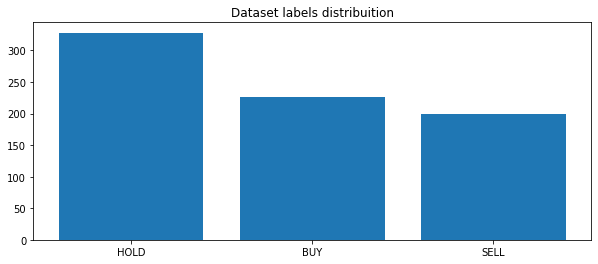

In [8]:
from collections import Counter
target_cnt = Counter(data['Decision'])

plt.figure(figsize=(10,4))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset labels distribuition");

Unequal classes are fine because we will use a specific evaluation metric to determine success in classification.

As you can see, there is a class imbalance issue with our data. This may be a problem but we do not want to discard data points so that each class equals the class with the least amount. Even though that may be a viable solution to class imbalance, there are other options we can explore. Another option would be using a different evaluation metric when validating our classification model such as precision and F-1 score. 

In [9]:
# Drop Non-numerical features
data=data.drop(['Decision'], axis=1)
data

,High,Low,Open,Close,Volume,Adj Close,Return,Intraday Return,Volume Return,Open-Close Movement,High-Low Ratio,retweet_count,favorite_count,vader compound,Trump Twitter Index,Close_TTI,Volume_TTI,Class
0,2276.959961,2265.010010,2269.959961,2271.310059,3524970000,2271.310059,0.003366,0.000595,0.113393,0.276982,0.527589,415061,1878671,2.2815,0.135696,2269.965939,8.042219e+09,2
1,2271.780029,2257.020020,2267.780029,2265.199951,3152710000,2265.199951,-0.002690,-0.001138,-0.105607,-0.155418,0.653960,26750,177839,0.4939,-0.056192,2267.777551,1.557123e+09,2
2,2284.629883,2266.679932,2267.879883,2280.070068,3810960000,2280.070068,0.006565,0.005375,0.208789,0.118309,0.791905,247498,1162781,1.6901,0.908453,2267.919940,6.440903e+09,1
3,2299.550049,2288.879883,2288.879883,2298.370117,3846020000,2298.370117,0.008026,0.004146,0.009200,0.386383,0.466174,138054,761424,0.7527,0.312087,2288.893518,2.894899e+09,1
4,2300.989990,2294.080078,2298.629883,2296.679932,3610360000,2296.679932,-0.000735,-0.000848,-0.061274,0.011302,0.301206,128887,609647,-0.4878,0.041381,2298.631683,-1.761134e+09,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,3288.129883,3268.429932,3271.129883,3288.129883,3456380000,3288.129883,0.006976,0.005197,0.075759,0.177004,0.602734,268945,1381607,-0.7894,-0.410250,3271.117341,-2.728466e+09,0
750,3294.250000,3277.189941,3285.350098,3283.149902,3665130000,3283.149902,-0.001515,-0.000670,0.060396,-0.084540,0.520570,291642,1396729,4.0937,-0.274155,3285.341753,1.500394e+10,2
751,3298.659912,3280.689941,3282.270020,3289.290039,3716840000,3289.290039,0.001870,0.002139,0.014109,-0.026800,0.547750,99948,424979,1.2886,0.275602,3282.278416,4.789520e+09,2
752,3317.110107,3302.820068,3302.969971,3316.810059,3535080000,3316.810059,0.008367,0.004190,-0.048902,0.415893,0.432662,295611,1444412,4.3147,1.807943,3303.024708,1.525281e+10,1


In [10]:
# Check for nulls in columns
data.isnull().sum()

High                   0
Low                    0
Open                   0
Close                  0
Volume                 0
Adj Close              0
Return                 0
Intraday Return        0
Volume Return          0
Open-Close Movement    0
High-Low Ratio         0
retweet_count          0
favorite_count         0
vader compound         0
Trump Twitter Index    0
Close_TTI              0
Volume_TTI             0
Class                  0
dtype: int64

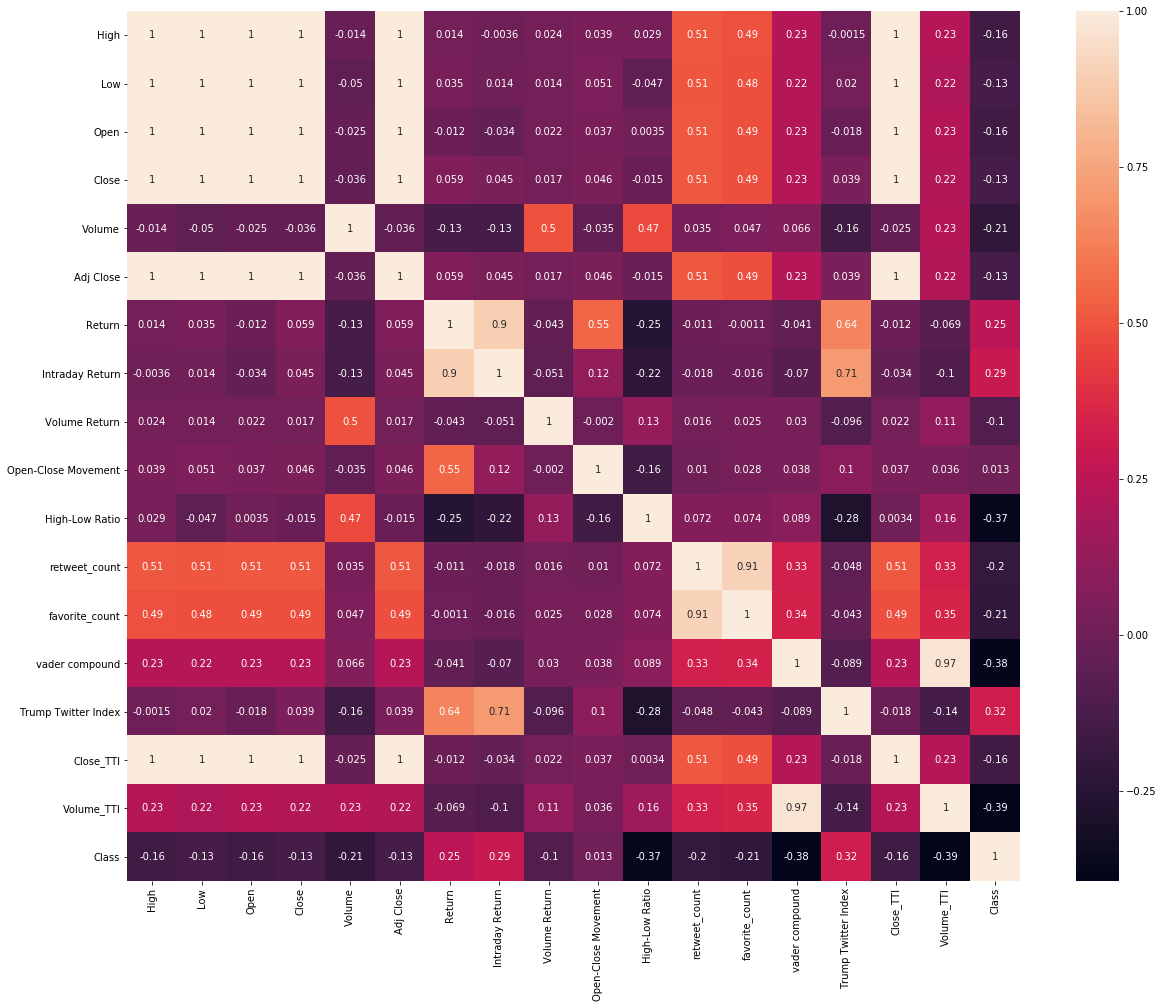

In [11]:
fig, ax = plt.subplots(figsize=(20,16)) 
sns.heatmap(data.corr(),annot=True);

> Visually, there is a correlation between the Trump Twitter Index and S&P500 Return, the positive correlation of 0.71 implies that Trump’s tweets do in fact move with the stock market. However, importantly, correlation does not imply causation. In other words, we have no indication of the direction of the relationship. There are also many individual factors that may affect stock returns such as interest rates, inflation expectations, and other idiosyncratic factors.
>
> Some features are influential in determining the class label and some have little to no correlation to the Decision of whether or not the stock/quarterly report is worth Buying, Selling, or Holding. As some features are known to be unimportant in determining the class label, those features can be removed from the dataset.

## Feature Engineering and Selection

Now that we have explored our data a little bit, we could continue doing some more exploration or move onto the Feature Engineering process or more specifically, Feature Selection. 

Feature engineering is the process of altering our dataset in order to enhance our machine learning models. There are a number of options for engineering the features of our dataset. They include but are not limited to:
- Creating interactive features. Have two distinct features interact with each other to create a brand new feature.
- Reducing the number of features. Since we have over 30 fundamental features, we could eliminate unimportant features in order to improve the performance of our models.
- Using domain knowledge. If we knew which features were most essential to a stock’s price based on economic and financial research, then we could attribute weights to those features.

Reducing the feature set for computational simplicity and potential improvement in accuracy by finding Feature Importances from the DataFrame 

For the purposes of this project, we will simply be eliminating unimportant features. By doing so, we can potentially improve our model’s accuracy and also reduce training time. This action is known as Feature Selection; the process of selecting features we consider necessary for our model. We will show 2 different ways of Feature Selection. This way we can compare and contrast the performances of our model with slightly different datasets due to our methods of selection.

In [12]:
from sklearn.ensemble import ExtraTreesClassifier

Selecting the Top 10 Features based on a Tree Classifier:

This next method of Feature Selection will be a little bit more complicated than the one we just did. By using Sci-Kit Learn’s library, we will be implementing a Decision Tree based classifier to determine which features are most important. By using this classifier, we will be able to determine which features are most important when classifying the QR or stock.

In [13]:
forest = ExtraTreesClassifier(n_estimators=200)

# Setting the corresponding variables for our classifier
X = data.drop(['Class'], 1)
y = data.Class

# Fitting the classifier
%timeit forest.fit(X, y)

411 ms ± 32.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
# Determining the important features
importances = forest.feature_importances_

# The standard deviation among the trees for the important features
std = np.std([i.feature_importances_ for i in forest.estimators_], axis=0)

# Indexing and sorting the important features
indices = np.argsort(importances)[::-1]

Next, with our important features all sorted out, we’ll visualize them to see exactly which features were determined to be most important. Just to get an idea of which features were selected

Feature Rankings:
1. Trump Twitter Index: 0.2522486689589362
2. Intraday Return: 0.16275703608405429
3. vader compound: 0.09388912872181603
4. Volume_TTI: 0.09272608491004697
5. Return: 0.08296777469185476
6. High-Low Ratio: 0.05469120683597579
7. favorite_count: 0.030136527249302724
8. retweet_count: 0.02838246456883549
9. Open-Close Movement: 0.02727610846844407
10. Volume: 0.025572794231197384


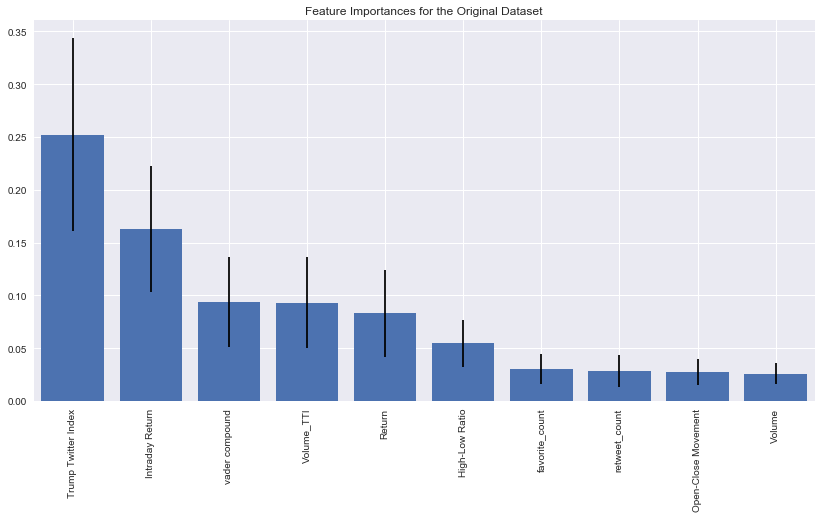

In [15]:
#Plotting the most important features

plt.style.use('seaborn')

print("Feature Rankings:")

# Showing the top 10 features
for i in range(10):
    print(f"{i+1}. {X.columns[indices[i]]}: {importances[indices[i]]}")
    
# Plotting the top 10 features
plt.figure(figsize=(14,7))

plt.title("Feature Importances for the Original Dataset")
plt.bar(range(X.shape[1]), importances[indices], yerr=std[indices], align='center')

plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-.5, 9.5])
plt.show()

In [16]:
# Selecting the Top 5 (excluding 'Class') most important features
# According to the feature importances from the original dataset 
# Assigning the top 5 features (excluding 'Class') as a new DF
top5_df = data[X.columns[indices][:6]].join(data.Class)
top5_df.head(6)

,Trump Twitter Index,Intraday Return,vader compound,Volume_TTI,Return,High-Low Ratio,Class
0,0.135696,0.000595,2.2815,8.042219e+09,0.003366,0.527589,2
1,-0.056192,-0.001138,0.4939,1.557123e+09,-0.002690,0.653960,2
2,0.908453,0.005375,1.6901,6.440903e+09,0.006565,0.791905,1
3,0.312087,0.004146,0.7527,2.894899e+09,0.008026,0.466174,1
4,0.041381,-0.000848,-0.4878,-1.761134e+09,-0.000735,0.301206,2
5,-0.273872,-0.001883,1.4541,4.559898e+09,-0.000866,0.322911,2


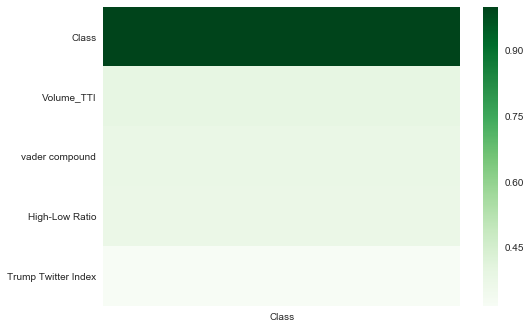

In [17]:
#Create heatmap of top correlations
top5_corr = np.abs(data.corr()[['Class']]).sort_values('Class', ascending=False)
sns.heatmap(top5_corr.head(5), cmap='Greens')

In [18]:
top5_corr.index

Index(['Class', 'Volume_TTI', 'vader compound', 'High-Low Ratio',
       'Trump Twitter Index', 'Intraday Return', 'Return', 'Volume',
       'favorite_count', 'retweet_count', 'High', 'Open', 'Close_TTI',
       'Adj Close', 'Close', 'Low', 'Volume Return', 'Open-Close Movement'],
      dtype='object')

In [19]:
data.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Return',
       'Intraday Return', 'Volume Return', 'Open-Close Movement',
       'High-Low Ratio', 'retweet_count', 'favorite_count', 'vader compound',
       'Trump Twitter Index', 'Close_TTI', 'Volume_TTI', 'Class'],
      dtype='object')

In [20]:
data=data.drop(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close','Close_TTI'], axis=1)
data

,Return,Intraday Return,Volume Return,Open-Close Movement,High-Low Ratio,retweet_count,favorite_count,vader compound,Trump Twitter Index,Volume_TTI,Class
0,0.003366,0.000595,0.113393,0.276982,0.527589,415061,1878671,2.2815,0.135696,8.042219e+09,2
1,-0.002690,-0.001138,-0.105607,-0.155418,0.653960,26750,177839,0.4939,-0.056192,1.557123e+09,2
2,0.006565,0.005375,0.208789,0.118309,0.791905,247498,1162781,1.6901,0.908453,6.440903e+09,1
3,0.008026,0.004146,0.009200,0.386383,0.466174,138054,761424,0.7527,0.312087,2.894899e+09,1
4,-0.000735,-0.000848,-0.061274,0.011302,0.301206,128887,609647,-0.4878,0.041381,-1.761134e+09,2
...,...,...,...,...,...,...,...,...,...,...,...
749,0.006976,0.005197,0.075759,0.177004,0.602734,268945,1381607,-0.7894,-0.410250,-2.728466e+09,0
750,-0.001515,-0.000670,0.060396,-0.084540,0.520570,291642,1396729,4.0937,-0.274155,1.500394e+10,2
751,0.001870,0.002139,0.014109,-0.026800,0.547750,99948,424979,1.2886,0.275602,4.789520e+09,2
752,0.008367,0.004190,-0.048902,0.415893,0.432662,295611,1444412,4.3147,1.807943,1.525281e+10,1


## Model: Machine Learning Classifiers

In [21]:
import _pickle as pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [22]:
X = data.drop(["Class"], 1)
y = data.Class

# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#### Baseline

In [23]:
# Importing the 10 models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [24]:
# Dummy (Baseline)
pipe_dum = Pipeline([('scale', StandardScaler()), ('clf', DummyClassifier())])

# Logistic Regression
pipe_lr  = Pipeline([('scale', StandardScaler()), ('clf', LogisticRegression())])

# Naive Bayes
pipe_nb  = Pipeline([('scale', StandardScaler()), ('clf', GaussianNB())])

In [25]:
pipelines = [pipe_dum, pipe_lr, pipe_nb]

models = ['Dummy(Baseline)', 
          'LogisticRegression',
          'NaiveBayes']

# Zipping the the strings and pipelines together and creating a dictionary
model_pipelines = dict(zip(models, pipelines))


In [26]:
# Looping through each Pipeline to fit and train each model
for name, pipe in model_pipelines.items():
    print(pipe)
    pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 DummyClassifier(constant=None, random_state=None,
                                 strategy='stratified'))],
         verbose=False)
Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)
Pipeline(memory=None,
         steps=[('scale

/Users/audreywong/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/audreywong/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [27]:
# Dictionary containing the model names and their scores
models_f1 = {}

# Looping through each model's predictions and getting their classification reports
for name, pipe in model_pipelines.items():
    print('\n'+ name + ' (Macro Avg - F1 Score):')
    
    # Classification Report
    report = classification_report(y_test, pipe.predict(X_test), target_names=['Sell', 'Buy', 'Hold'], output_dict=True)
    f1 = report['macro avg']['f1-score']
    
    # Assigning to the Dictionary
    models_f1[name] = f1
    
    print(f1)


Dummy(Baseline) (Macro Avg - F1 Score):
0.25263923751318706

LogisticRegression (Macro Avg - F1 Score):
0.8431211576479024

NaiveBayes (Macro Avg - F1 Score):
0.825925925925926


In [28]:
# Fitting and training the dummy
dummy = DummyClassifier(strategy='stratified')
dummy.fit(X_train, y_train)

# Dummy predictions
dum_pred = dummy.predict(X_test)

#Printing out results
report = classification_report(y_test, dum_pred, target_names=['Sell', 'Buy', 'Hold'])
print(report)

              precision    recall  f1-score   support

        Sell       0.24      0.25      0.25        48
         Buy       0.27      0.23      0.25        56
        Hold       0.46      0.49      0.48        85

    accuracy                           0.35       189
   macro avg       0.32      0.33      0.32       189
weighted avg       0.35      0.35      0.35       189



In [29]:
#Import and run Logistic Regression and run a fit to train the model
from sklearn.linear_model import LogisticRegression

# Fitting and training the model
LR = LogisticRegression()
model_LR = LR.fit(X_train,y_train)

#Predict the y test 
y_pred_LR = model_LR.predict(X_test)

#Printing out results
report = classification_report(y_test, y_pred_LR, target_names=['Sell', 'Buy', 'Hold'])
print(report)

              precision    recall  f1-score   support

        Sell       0.67      0.04      0.08        48
         Buy       0.32      0.59      0.41        56
        Hold       0.56      0.54      0.55        85

    accuracy                           0.43       189
   macro avg       0.51      0.39      0.35       189
weighted avg       0.52      0.43      0.39       189



/Users/audreywong/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/audreywong/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [30]:
#Print the accuracy score of our predicted y using metrics from sklearn
from sklearn import metrics
print (metrics.accuracy_score(y_test, y_pred_LR))

0.42857142857142855


In [31]:
#Import and run Gaussian Naive Bayes and run a fit to train the model
from sklearn.naive_bayes import GaussianNB

# Fitting and training the model
GNB = GaussianNB()
model_GNB = GNB.fit(X_train,y_train)

#Predict the y test 
y_pred_GNB = model_GNB.predict(X_test)

#Printing out results
report = classification_report(y_test, y_pred_GNB, target_names=['Sell', 'Buy', 'Hold'])
print(report)

              precision    recall  f1-score   support

        Sell       0.46      0.12      0.20        48
         Buy       0.39      0.30      0.34        56
        Hold       0.59      0.92      0.72        85

    accuracy                           0.53       189
   macro avg       0.48      0.45      0.42       189
weighted avg       0.50      0.53      0.47       189



In [32]:
#Print the accuracy score of our predicted y using metrics from sklearn
from sklearn import metrics
print (metrics.accuracy_score(y_test, y_pred_GNB))

0.5343915343915344


> The baseline accuracy score is 0.37. The accuracy for the Logistic Regression (0.43) model and Naïve Bayes (0.53) model are both better than the baseline. The accuracy score for the Naïve Bayes model is better than the Logistic Regression, which indicates a better model.
> 
> However, it is important to look at the precision, recall and F-1 scores as well. The overall scores for the Naïve Bayes model appear to perform better than the baseline, with the exception of the recall score for sell and buy and F-1 score for sell. The recall score indicates when the actual value is positive (to sell and buy) and how often the model's prediction is correct. In the case of predicting stock prices, investors will be most concern with the precision score. 
>
>
> Therefore, taking the Naïve Bayes model to predict unseen data will be explored below. 

## Classifying New Data

In [33]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import _pickle as pickle
import numpy as np
import pandas as pd
from joblib import load
from sklearn.preprocessing import StandardScaler

In [34]:
# Read S&P500 file as csv
unseen_data = pd.read_csv('../datasets/unseen/combined_unseen.csv')
unseen_data

,Unnamed: 0,Date,Return,Intraday Return,Volume Return,Open-Close Movement,High-Low Ratio,retweet_count,favorite_count,vader compound,Trump Twitter Index,Volume_TTI
0,1,2020-03-25,0.011535,0.007238,0.097825,0.426585,6.807387,233373,1175179,4.7761,5.509237,3.957319e+10


In [35]:
unseen_data=unseen_data.drop(['Unnamed: 0'], axis=1)
unseen_data

,Date,Return,Intraday Return,Volume Return,Open-Close Movement,High-Low Ratio,retweet_count,favorite_count,vader compound,Trump Twitter Index,Volume_TTI
0,2020-03-25,0.011535,0.007238,0.097825,0.426585,6.807387,233373,1175179,4.7761,5.509237,3.957319e+10


In [36]:
def prediction(pred):
    """
    Returns the class label for the prediction
    """
    print('The Classifier has determined this stock to be a...')
    if pred == 1:
        print('BUY')
    elif pred == 0:
        print('SELL')
    else:
        print('HOLD')

In [37]:
def pie_stock(pred):
    """
    Creates a pie chart of the stock class predictions
    """
    rcParams['font.size'] = 20.0
    plt.style.use('bmh')
    plt.figure(figsize=(5,5))
    plt.pie(pred[0], 
            labels=['SELL', 'BUY','HOLD'], 
            shadow=True,
            explode=(.05,.05,.05),
            autopct='%1.1f%%')
    plt.title('Trump')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

In [38]:
def format_qr(df):
    """
    Formats the DF from the Stockpup dataset so that the values and columns line up with training and testing data
    Uses the second DF of our data to find the appropriate feature columns to use and will be appended to
    Scales the DF with the new data
    Returns the QR with the new scaled data
    """
    # Setting the Datetime index
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index("Date")
    
    # Sort the DF based on date
    df = df.sort_index(ascending=False)
    
    # Using only the latest QR
    df = df.head(1)
    
    # Scaling the data
    scaler = StandardScaler()
    
    df = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)
    
    # Finding the latest scaled QR
    df = df.tail(1)
    
    # Returning the latest scaled QR with the appropriate features
    return df

In [39]:
# Viewing the DF with the latest scaled QR
qr_df = format_qr(unseen_data)

### Using the Classifier to make a new Prediction

In [40]:
# Predict the class for latest Trump's Tweet posted
class_label = model_GNB.predict(qr_df)[0]

prediction(class_label)

The Classifier has determined this stock to be a...
HOLD


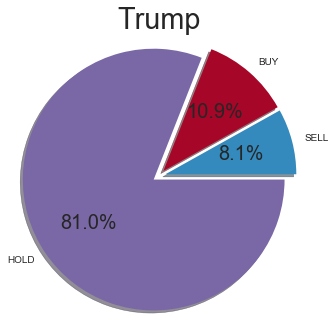

In [41]:
# Visualise the Prediction probabilities for latest Trump's Tweet posted
pie_stock(model_GNB.predict_proba(qr_df))

Interpretation: According to our classifier, S&P500 has a 81.0% chance of being a 'Hold'.

<i> Disclaimer: The value of your investments can go down as well as up and you may get back less than you originally invested. This does not offer any advice, so it's important you understand the risks, if you're unsure please consult a suitably qualified financial adviser. Tax treatment depends on your individual circumstances and rules may change.</i>